In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
np.set_printoptions(precision=2)

In [73]:
df =pd.read_csv("Position_Salaries.csv")
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [74]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1:].values

In [84]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [85]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [77]:
# linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [90]:
# polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)  # jumlah independent variable (column)
X_poly = poly_reg.fit_transform(X)   # berisi independent variable yang mau dipower.  X_poly = X Xpower2 Xpower3 Xpower4
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

In [91]:
print(X_poly)

[[1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00]
 [1.00e+00 2.00e+00 4.00e+00 8.00e+00 1.60e+01]
 [1.00e+00 3.00e+00 9.00e+00 2.70e+01 8.10e+01]
 [1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02]
 [1.00e+00 5.00e+00 2.50e+01 1.25e+02 6.25e+02]
 [1.00e+00 6.00e+00 3.60e+01 2.16e+02 1.30e+03]
 [1.00e+00 7.00e+00 4.90e+01 3.43e+02 2.40e+03]
 [1.00e+00 8.00e+00 6.40e+01 5.12e+02 4.10e+03]
 [1.00e+00 9.00e+00 8.10e+01 7.29e+02 6.56e+03]
 [1.00e+00 1.00e+01 1.00e+02 1.00e+03 1.00e+04]]


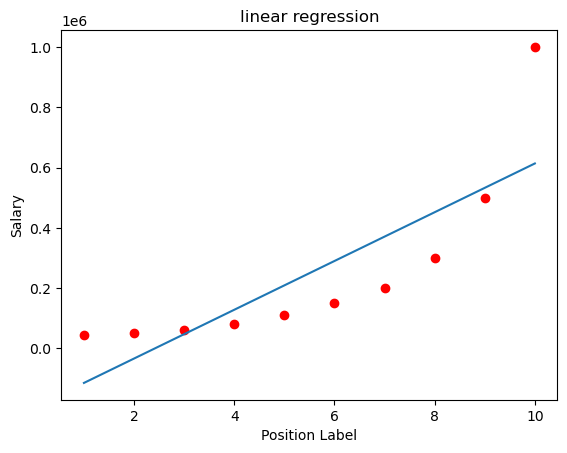

In [79]:
# visualising linear regression
plt.scatter(X, y, color="red")
plt.plot(X, lin_reg.predict(X))
plt.title("linear regression")
plt.xlabel("Position Label")
plt.ylabel("Salary")
plt.show()

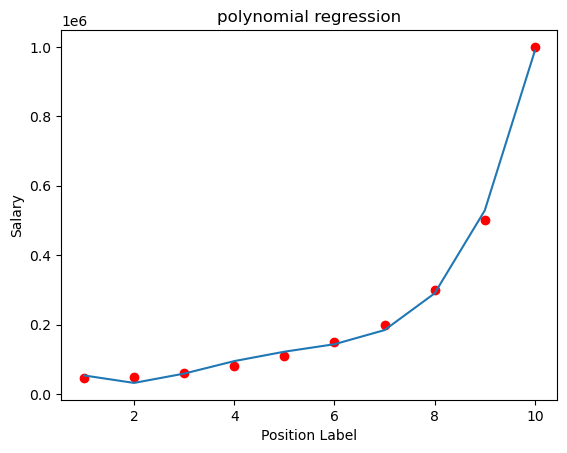

In [80]:
# visualising polynomial regression
plt.scatter(X, y, color="red")
plt.plot(X, lin_reg_2.predict(X_poly))
plt.title("polynomial regression")
plt.xlabel("Position Label")
plt.ylabel("Salary")
plt.show()

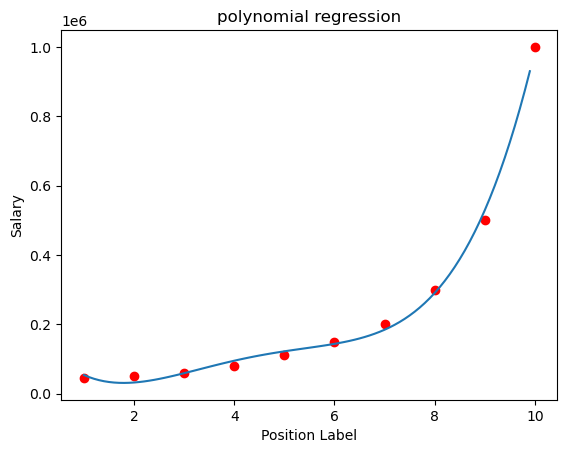

In [81]:
# visualising polynomial regression (higher resolution)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X, y, color="red")
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)))
plt.title("polynomial regression")
plt.xlabel("Position Label")
plt.ylabel("Salary")
plt.show()

In [82]:
# predicting linear regression
output_lin = lin_reg.predict([[6.5]])
print(output_lin)

[[330378.79]]


In [86]:
# predicting polynomial regression
output_poly = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
print(output_poly)

[[158862.45]]


In [88]:
# intercept
print(lin_reg_2.intercept_)

[184166.67]


In [89]:
# coeffisient
print(lin_reg_2.coef_)

[[      0.   -211002.33   94765.44  -15463.29     890.15]]


## Equation polynomial degree = 4 :
## Salary = 184166.67 - 211002.33 × level + 94765.44 x level power 2 - 15463.29 x level power 3 + 890.15 x level power 4